# Artificial Neural Network (ANN) from Scratch Using Python 2.0
## Multilayer Perceptron (MLP) with Three Input Variables and Two Neurons in a Hidden Layer
## Joel Raymond Day

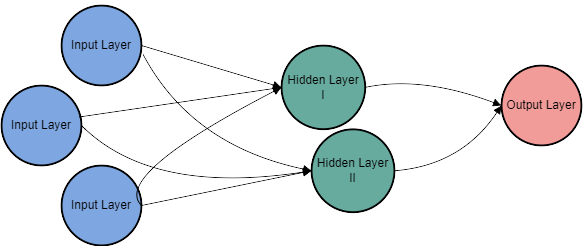

In [152]:
import numpy as np # for math
import pandas as pd # for data storage
import random # for weight and bias generation
import time # to record training time
import matplotlib.pyplot as plt # visuals

# Load and Scale Data

In [153]:
# independent variables (requires scaling)
age = np.array([60, 63, 17, 35, 90, 10])
exercise = np.array([8, 2, 7, 4, 1, 9])
diet = np.array([7, 2, 7, 5, 1, 7])

# min-max scaling for independent features
x1 = (age - 0) / (101 - 0)
x2 = (exercise - 0) / (11 - 0)
x3 = (diet - 0) / (11 - 0)

In [154]:
# dependent variable (does not need to be scaled)
y = np.array([7, 3, 9, 6, 1, 10])

# Initiate Neural Network Parameters
## (1) Weights and Bias

h1.png

h2.png

Z_model 2.png

In [155]:
# generate a random number uniformly between lower and upper bound
lower_bound = .1
upper_bound = .9

# initiate random weights
w1 = random.uniform(lower_bound, upper_bound)
w2 = random.uniform(lower_bound, upper_bound)
w3 = random.uniform(lower_bound, upper_bound)
w4 = random.uniform(lower_bound, upper_bound)
w5 = random.uniform(lower_bound, upper_bound)
w6 = random.uniform(lower_bound, upper_bound)
w7 = random.uniform(lower_bound, upper_bound)
w8 = random.uniform(lower_bound, upper_bound)

# initiate bias - can be set to zero (unlike weights)
b1 = 0
b2 = 0
b3 = 0

# initiate hidden neuron values to store for backward propagation
h1 = 0
h2 = 0

# learning rate
lr = 0.005

# epochs
iterations = 2000

## (2) Activation Function and its Derivitive
## Activation Functions Neural Networks: A Quick & Complete Guide [link text](https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide/)

identity.png

In [156]:
# Activation function : identity function
def activ_func(x):
    return x # identity

# Derivative of the identity activation function wrt sum of inputs and weights equation (L)
def d_activ_func(x):
    return 1

## (3) Forward propagation

y_hat.png

## (4) Loss Function and its Derivitive
## Mean Squared Error loss function and its gradient (derivative) for a batch of inputs [link text](https://www.bragitoff.com/2021/12/mean-squared-error-loss-function-and-its-gradient-derivative-for-a-batch-of-inputs-python-code/#google_vignette)

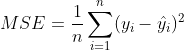

In [157]:
# n = number of samples (also equal to the length of the input vectors)
n = len(age)

In [158]:
# Mean Suared Error (MSE)
def MSE(predictions, targets):
    return ((1/n)*np.sum(((predictions-targets)**2)))
    # ALT METHOD: divide by 2 to make the derivitive simpler. return ((1/2n)*np.sum((predictions-targets)**2))
    # ALT METHOD: derivitive would be...       ((1/n)*(predictions - targets))

# Derivitve of Mean Suared Error wrt to the activation equation (Y_pred)
def d_MSE(predictions, targets):
    return ((1/n)*2*(predictions - targets))

## (5) Backward Propagation
## Gradient Equation [link text](https://sebastianraschka.com/faq/docs/mse-derivative.html)

## For weights 7 & 8

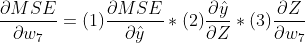

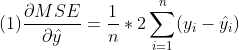

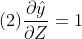

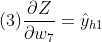

In [159]:
def back_propagation_layer_2(predictions, targets, Z, h1, h2, parameter):
  # calculate the gradient for each parameter by multipling each partial derivitve (chain rule)

  # (1)
  one = d_MSE(predictions, targets)

  # (2)
  two = d_activ_func(Z)

  # (3)
  if parameter == 'w7':
    three = h1
  elif parameter == 'w8':
    three = h2
  # bias is 1 (not = bias) because it is not multiplied by an input variable
  elif parameter == 'b3':
    three  = 1
  else:
    print('invalid parameter')

  # calculate gradient
  # returns a vector of gradients the size of input vector
  # gradient sizes may be able to distinguish feature importance (or at least find the feature that has the potential to improve the model the most)
  gradient =  one * two * three

  # divide by n again to get the average loss per sample
  # returns the mean gradient for the vector of gradients
  avg_gradient = np.mean(gradient)

  return avg_gradient

## For Weights 1 - 6

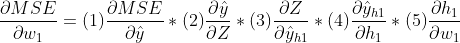

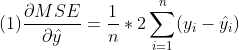

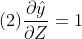

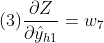

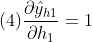

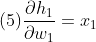

In [160]:
def back_propagation_layer_1(predictions, targets, Z, parameter):
  # calculate the gradient for each parameter by multipling each partial derivitve (chain rule)

  # (1)
  one = d_MSE(predictions, targets)

  # (2)
  two = d_activ_func(Z)

  # (3)
  if parameter == 'w1':
    three = w7
  elif parameter == 'w2':
    three = w7
  elif parameter == 'w3':
    three = w7
  elif parameter == 'w4':
    three = w8
  elif parameter == 'w5':
    three = w8
  elif parameter == 'w6':
    three = w8
  elif parameter == 'b1':
    three = 1
  elif parameter == 'b2':
    three = 1
  else:
    print('invalid parameter')

  # (4)
  four = 1

  # (5)
  if parameter == 'w1':
    five = x1
  elif parameter == 'w2':
    five = x2
  elif parameter == 'w3':
    five = x3
  elif parameter == 'w4':
    five = x1
  elif parameter == 'w5':
    five = x2
  elif parameter == 'w6':
    five = x3
  elif parameter == 'b1':
    five = 1
  elif parameter == 'b2':
    five = 1
  else:
    print('invalid parameter')

  # calculate gradient
  # returns a vector of gradients the size of input vector
  # gradient sizes may be able to distinguish feature importance (or at least find the feature that has the potential to improve the model the most)
  gradient = one * two * three * four * five

  # divide by n again to get the average loss per sample
  # returns the mean gradient for the vector of gradients
  avg_gradient = np.mean(gradient)

  return avg_gradient

# Train Neural Network

In [161]:
def hidden_layer_model(x1, x2, x3, w1, w2, w3, w4, w5, w6, w7, w8, b1, b2, b3):

    h1 = w1*x1 + w2*x2 + w3*x3 + b1
    h2 = w4*x1 + w5*x2 + w6*x3 + b2
    Z = w7*h1 + w8*h2 + b3
    Y_pred = activ_func(Z)
    return Y_pred, Z, h1, h2

In [162]:
start_time = time.time()
data_storage = pd.DataFrame(columns=['Z', 'y_pred', 'RMSE', 'w1_gradient', 'w2_gradient', 'w3_gradient', 'w4_gradient', 'w5_gradient', 'w6_gradient','w7_gradient', 'w8_gradient', 'b1_gradient','b2_gradient','b3_gradient', 'w1', 'w2', 'w3','w4', 'w5', 'w6','w7', 'w8', 'b1', 'b2', 'b3'])
for i in range(iterations):

    # Forward propagation
    Y_pred, Z, h1, h2 = hidden_layer_model(x1, x2, x3, w1, w2, w3, w4, w5, w6, w7, w8, b1, b2, b3)

    # calculate prediction error
    loss = MSE(Y_pred, y)
    RMSE = np.sqrt(loss)

    # Backward propagation
    # calculate the gradient for each parameter
    w1_gradient = back_propagation_layer_1(Y_pred, y, Z, 'w1')
    w2_gradient = back_propagation_layer_1(Y_pred, y, Z, 'w2')
    w3_gradient = back_propagation_layer_1(Y_pred, y, Z, 'w3')
    w4_gradient = back_propagation_layer_1(Y_pred, y, Z, 'w4')
    w5_gradient = back_propagation_layer_1(Y_pred, y, Z, 'w5')
    w6_gradient = back_propagation_layer_1(Y_pred, y, Z, 'w6')
    w7_gradient = back_propagation_layer_2(Y_pred, y, Z, h1, h2, 'w7')
    w8_gradient = back_propagation_layer_2(Y_pred, y, Z, h1, h2, 'w8')

    b1_gradient = back_propagation_layer_1(Y_pred, y, Z, 'b1')
    b2_gradient = back_propagation_layer_1(Y_pred, y, Z, 'b2')
    b3_gradient = back_propagation_layer_2(Y_pred, y, Z, h1, h2, 'b3')

    # update weights and bias
    # the gradient vector points in the direction that will reduce error the most.
    # this value is negitive so you must subtract the gradient from the weight so the negitives cancel.
    w1 -= lr * w1_gradient
    w2 -= lr * w2_gradient
    w3 -= lr * w3_gradient
    w4 -= lr * w4_gradient
    w5 -= lr * w5_gradient
    w6 -= lr * w6_gradient
    w7 -= lr * w7_gradient
    w8 -= lr * w8_gradient

    b1 -= lr * b1_gradient
    b2 -= lr * b2_gradient
    b3 -= lr * b3_gradient

    # store values in df
    data_storage.loc[i] = [Z, Y_pred, RMSE, w1_gradient, w2_gradient, w3_gradient, w4_gradient, w5_gradient, w6_gradient, w7_gradient, w8_gradient, b1_gradient,b2_gradient, b3_gradient, w1, w2, w3,w4, w5, w6,w7, w8, b1, b2, b3]
end_time = time.time()
print('Training Time: ', round(end_time - start_time, 4), 'Seconds')


Training Time:  6.0673 Seconds


# Performance Evaluation

In [163]:
data_storage.head(3)

,Z,y_pred,RMSE,w1_gradient,w2_gradient,w3_gradient,w4_gradient,w5_gradient,w6_gradient,w7_gradient,...,w2,w3,w4,w5,w6,w7,w8,b1,b2,b3
0,"[0.985819070240791, 0.5548968307550113, 0.6685...","[0.985819070240791, 0.5548968307550113, 0.6685...",6.154230,-0.342935,-0.703107,-0.641048,-0.174441,-0.357650,-0.326083,-1.506695,...,0.573899,0.499225,0.515121,0.504087,0.108434,0.649370,0.331142,0.008848,0.008848,0.008848
1,"[1.0201166607687941, 0.5811645695135828, 0.698...","[1.0201166607687941, 0.5811645695135828, 0.698...",6.128302,-0.344128,-0.708260,-0.645696,-0.175486,-0.361173,-0.329269,-1.522124,...,0.577441,0.502454,0.515999,0.505893,0.110081,0.656980,0.335873,0.017648,0.017648,0.017648
2,"[1.0548242965673116, 0.6076921042473798, 0.727...","[1.0548242965673116, 0.6076921042473798, 0.727...",6.102110,-0.345265,-0.713389,-0.650321,-0.176513,-0.364711,-0.332468,-1.537179,...,0.581008,0.505705,0.516881,0.507717,0.111743,0.664666,0.340675,0.026398,0.026398,0.026398


In [164]:
data_storage.tail(3)

,Z,y_pred,RMSE,w1_gradient,w2_gradient,w3_gradient,w4_gradient,w5_gradient,w6_gradient,w7_gradient,...,w2,w3,w4,w5,w6,w7,w8,b1,b2,b3
1997,"[8.007277823835542, 2.675421116170613, 8.56297...","[8.007277823835542, 2.675421116170613, 8.56297...",0.492245,0.031949,0.014521,0.004083,0.017976,0.008170,0.002297,-0.004190,...,1.742150,1.562211,-0.403534,1.191903,0.732843,2.374729,1.336133,0.500700,0.500700,0.500700
1998,"[8.007142251637603, 2.6753726174986268, 8.5630...","[8.007142251637603, 2.6753726174986268, 8.5630...",0.492172,0.031921,0.014528,0.004090,0.017960,0.008174,0.002301,-0.004177,...,1.742077,1.562190,-0.403624,1.191862,0.732832,2.374750,1.336148,0.500763,0.500763,0.500763
1999,"[8.007006696156628, 2.675324403504884, 8.56318...","[8.007006696156628, 2.675324403504884, 8.56318...",0.492098,0.031893,0.014535,0.004097,0.017945,0.008178,0.002305,-0.004163,...,1.742005,1.562170,-0.403713,1.191821,0.732820,2.374771,1.336164,0.500826,0.500826,0.500826


In [165]:
# compare the most recent guess with the actual
print('Prediction: ', data_storage.iloc[-1]['y_pred'])
print('Actual: ',y)
print('How far away is my prediction on average? RMSE: ',round((np.sqrt(MSE(data_storage.iloc[-1]['y_pred'], y))), 3))

Prediction:  [8.0070067  2.6753244  8.56318328 5.69719479 1.05190795 9.78024331]
Actual:  [ 7  3  9  6  1 10]
How far away is my prediction on average? RMSE:  0.492


# Predict Custom Health Scores

In [166]:
# pull the trained weights and bias values from the last row of the dataframe
fw1 = data_storage.iloc[-1]['w1']
fw2 = data_storage.iloc[-1]['w2']
fw3 = data_storage.iloc[-1]['w3']
fw4 = data_storage.iloc[-1]['w4']
fw5 = data_storage.iloc[-1]['w5']
fw6 = data_storage.iloc[-1]['w6']
fw7 = data_storage.iloc[-1]['w7']
fw8 = data_storage.iloc[-1]['w8']
fb1 = data_storage.iloc[-1]['b1']
fb2 = data_storage.iloc[-1]['b2']
fb3 = data_storage.iloc[-1]['b3']

In [167]:
def final_model_version_2(x1, x2, x3):

    x1 = (x1 - 0) / (101 - 0)
    x2 = (x2 - 0) / (11 - 0)
    x3 = (x3 - 0) / (11 - 0)

    h1 = (fw1*x1) + (fw2*x2) + (fw3*x3) + fb1
    h2 = (fw4*x1) + (fw5*x2) + (fw6*x3) + fb2
    Z = (fw7*h1) + (fw8*h2 + fb3)

    #Y_pred = activ_func(Z)

    return Z

In [181]:
# predict health values based on theee custom metrics
age = 20
health = 1
diet = 5
health = final_model_version_2(age, health, diet)
print(health)

4.510499467261221


# Convergence Visuals
## template code for visuals [link text](https://medium.com/@soudanik/building-a-deep-learning-model-by-hand-bd51feccdfc7)

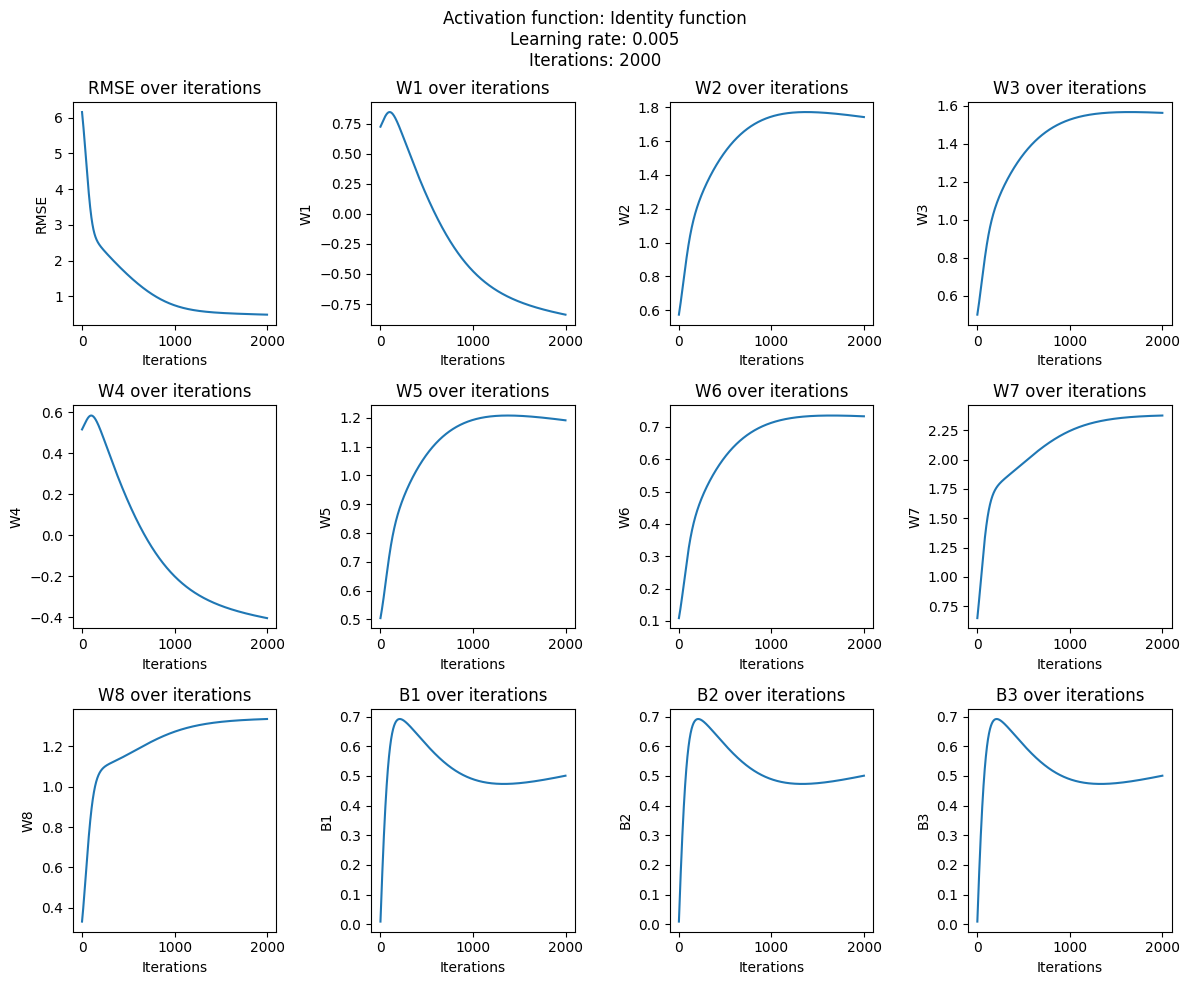

In [191]:
# plot template
fig, axs = plt.subplots(3, 4, figsize=(12,10))  # Create 5 subplots on one line

# plot RMSE
axs[0, 0].plot(range(iterations), data_storage['RMSE'])
axs[0, 0].set_title('RMSE over iterations')
axs[0, 0].set_xlabel('Iterations')
axs[0, 0].set_ylabel('RMSE')

# plot w1
axs[0, 1].plot(range(iterations), data_storage['w1'])
axs[0, 1].set_title('W1 over iterations')
axs[0, 1].set_xlabel('Iterations')
axs[0, 1].set_ylabel('W1')

# plot w2
axs[0, 2].plot(range(iterations), data_storage['w2'])
axs[0, 2].set_title('W2 over iterations')
axs[0, 2].set_xlabel('Iterations')
axs[0, 2].set_ylabel('W2')

# plot w2
axs[0, 3].plot(range(iterations), data_storage['w3'])
axs[0, 3].set_title('W3 over iterations')
axs[0, 3].set_xlabel('Iterations')
axs[0, 3].set_ylabel('W3')

# plot w4
axs[1, 0].plot(range(iterations), data_storage['w4'])
axs[1, 0].set_title('W4 over iterations')
axs[1, 0].set_xlabel('Iterations')
axs[1, 0].set_ylabel('W4')

# plot w5
axs[1, 1].plot(range(iterations), data_storage['w5'])
axs[1, 1].set_title('W5 over iterations')
axs[1, 1].set_xlabel('Iterations')
axs[1, 1].set_ylabel('W5')

# plot w6
axs[1, 2].plot(range(iterations), data_storage['w6'])
axs[1, 2].set_title('W6 over iterations')
axs[1, 2].set_xlabel('Iterations')
axs[1, 2].set_ylabel('W6')

# plot w7
axs[1, 3].plot(range(iterations), data_storage['w7'])
axs[1, 3].set_title('W7 over iterations')
axs[1, 3].set_xlabel('Iterations')
axs[1, 3].set_ylabel('W7')

# plot w8
axs[2, 0].plot(range(iterations), data_storage['w8'])
axs[2, 0].set_title('W8 over iterations')
axs[2, 0].set_xlabel('Iterations')
axs[2, 0].set_ylabel('W8')

# plot b1
axs[2, 1].plot(range(iterations), data_storage['b1'])
axs[2, 1].set_title('B1 over iterations')
axs[2, 1].set_xlabel('Iterations')
axs[2, 1].set_ylabel('B1')

# plot b2
axs[2, 2].plot(range(iterations), data_storage['b2'])
axs[2, 2].set_title('B2 over iterations')
axs[2, 2].set_xlabel('Iterations')
axs[2, 2].set_ylabel('B2')

# plot b3
axs[2, 3].plot(range(iterations), data_storage['b3'])
axs[2, 3].set_title('B3 over iterations')
axs[2, 3].set_xlabel('Iterations')
axs[2, 3].set_ylabel('B3')

# Set a common title for all subplots
fig.suptitle(f"Activation function: Identity function\nLearning rate: {lr}\nIterations: {iterations}")
plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()

# Other Activation Functions

## Sigmoid

In [170]:
# sigmoid activation function (non-linear)
def sigmoid_activ_func(x):
    for i in range(len(x)):
      x[i] = 1 / (1 + np.exp(-x[i]))
    return x

# derivative of sigmoid activation function
def d_sigmoid_activ_func(x):
    x = sigmoid_activ_func(x)
    x = x * (1 - x)
    return x

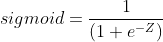

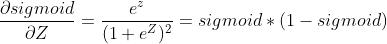

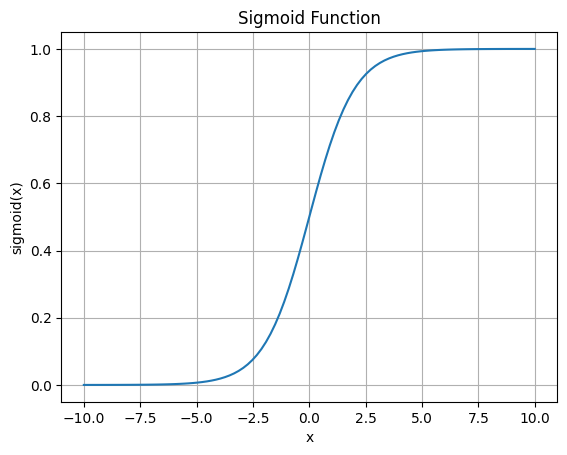

In [171]:
# simple igmoid function for visual
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# generate data for visual
x_sig = np.linspace(-10, 10, 100)
y_sig = sigmoid(x_sig)

# plot
plt.plot(x_sig, y_sig)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.show()

## derivitive  math [link text](https://mathworld.wolfram.com/SigmoidFunction.html)

## ReLu

In [172]:
# ReLu activation function (non-linear)
def relu_activ_func(x):
    for i in range(len(x)):
        x[i] = max(0, x[i]) # ReLu
    return x

# Derivative of ReLu activation function
def d_relu_activ_func(x):
    for i in range(len(x)):
        if x[i] > 0:
            x[i] = 1
        else:
            x[i] = 0
    return x

relu.png

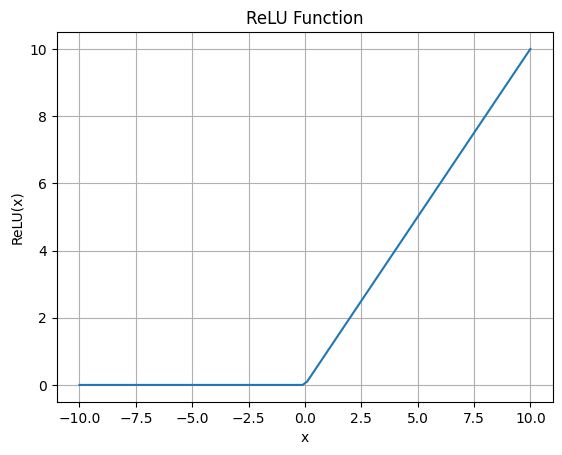

In [173]:
# simple relu function for visual
def relu(x):
    return np.maximum(0, x)

# generate data for visual
x = np.linspace(-10, 10, 100)
y = relu(x)

# plot
plt.plot(x, y)
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.show()

# Other Scaling

## Standardization

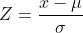

In [174]:
# Calculate mean and standard deviation
mean_x1 = np.mean(x1)
std_x1 = np.std(x1)

mean_x2 = np.mean(x2)
std_x2 = np.std(x2)

# Standardize the vectors
#x1 = (x1 - mean_x1) / std_x1
#x2 = (x2 - mean_x2) / std_x2